# Multiple Linear Regression
## Geely Auto Case Study

#### Problem Statement:
Geely Auto want to understand the factors affecting the pricing of cars in the American market, since those may be very different from the Chinese market. The company wants to know:

1. Which variables are significant in predicting the price of a car
2. How well those variables describe the price of a car

#### Business Goal:

You are required to model the price of cars with the available independent variables. It will be used by the management to understand how exactly the prices vary with the independent variables. They can accordingly manipulate the design of the cars, the business strategy etc. to meet certain price levels. 

## Step 1: Reading and Understanding the Data

Let us first import NumPy and Pandas and read the housing dataset

In [69]:
import numpy as np
import pandas as pd
%config IPCompleter.greedy=True

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [70]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [71]:
car_df=pd.read_csv('CarPrice_Assignment.csv', index_col='car_ID')
print(car_df.shape)


(205, 25)


In [72]:
car_df.head()

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
car_ID,,,,,,,,,,,,,,,,,,,,,,,,,
1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [73]:
# car_df['symboling']=car_df['symboling'].astype('category')
car_df.describe()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


Removing outlier as first 2 percentile and last 2 percentiles of price

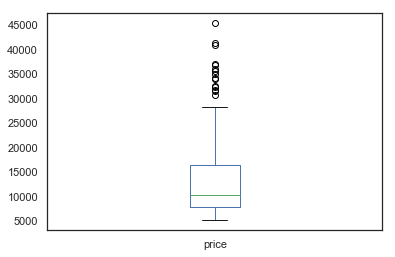

In [74]:
car_df['price'].plot.box()

In [75]:
# q02 = car_df['price'].quantile(.02)
# q95 = car_df['price'].quantile(.95)
# car_df=car_df[((car_df['price'] >= q02) & (car_df['price'] <= q95))]
# car_df.shape

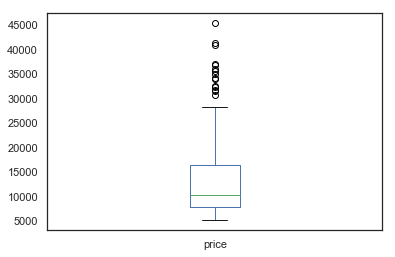

In [76]:
car_df['price'].plot.box()

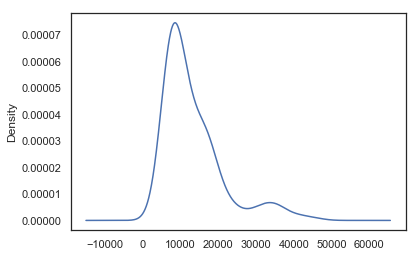

In [77]:
car_df['price'].plot.kde()

Extracting the Car Company name from CarName:
1. Replace - with space in CarName for making the names uniform
2. Split the names on space and selecting the first split


In [78]:
car_df['CarName']=car_df['CarName'].str.lower().str.replace('-',' ')
car_df['CarCompany']=car_df['CarName'].apply(lambda c: c.split(' ')[0])
car_df['CarCompany'].unique()

array(['alfa', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda', 'isuzu',
       'jaguar', 'maxda', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'porcshce', 'renault',
       'saab', 'subaru', 'toyota', 'toyouta', 'vokswagen', 'volkswagen',
       'vw', 'volvo'], dtype=object)

3. As per data, need to fix following:
    * 'mazda' is wrongly spelled as 'maxda' , 
    * 'porsche' as 'porcshce', 
    * 'toyota' as 'toyouta' and 
    * 'volkswagen' is written in multiple ways as 'vokswagen' and  'vw'. 

In [79]:
car_df['CarCompany']=car_df['CarCompany'].str.replace('maxda','mazda')
car_df['CarCompany']=car_df['CarCompany'].str.replace('porcshce','porsche')
car_df['CarCompany']=car_df['CarCompany'].str.replace('toyouta','toyota')
car_df['CarCompany']=car_df['CarCompany'].str.replace('vokswagen','volkswagen')
car_df['CarCompany']=car_df['CarCompany'].str.replace('vw','volkswagen')
car_df.drop('CarName', axis=1, inplace=True)
car_df['CarCompany'].unique()

array(['alfa', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda', 'isuzu',
       'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi', 'nissan',
       'peugeot', 'plymouth', 'porsche', 'renault', 'saab', 'subaru',
       'toyota', 'volkswagen', 'volvo'], dtype=object)

#### Derived Variables
power-to-weight = horsepower/curb-weight

In [80]:
car_df['powertoweight']=car_df['horsepower']/car_df['curbweight']

In [81]:
#car_df['stroketoboreratio']=car_df['stroke']/car_df['boreratio']

## Step 2: Visualising the Data

Let's now spend some time doing what is arguably the most important step - **understanding the data**.
- If there is some obvious multicollinearity going on, this is the first place to catch it
- Here's where you'll also identify if some predictors directly have a strong association with the outcome variable

We'll visualise our data using `matplotlib` and `seaborn`.

In [82]:
import matplotlib.pyplot as plt
import seaborn as sns

#### Visualising Numeric Variables

Let's make a pairplot of all the numeric variables

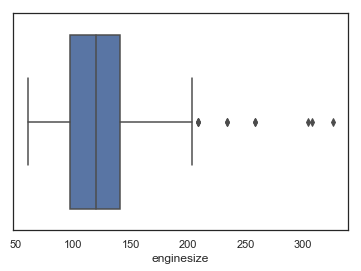

In [83]:
sns.boxplot(car_df['enginesize'])

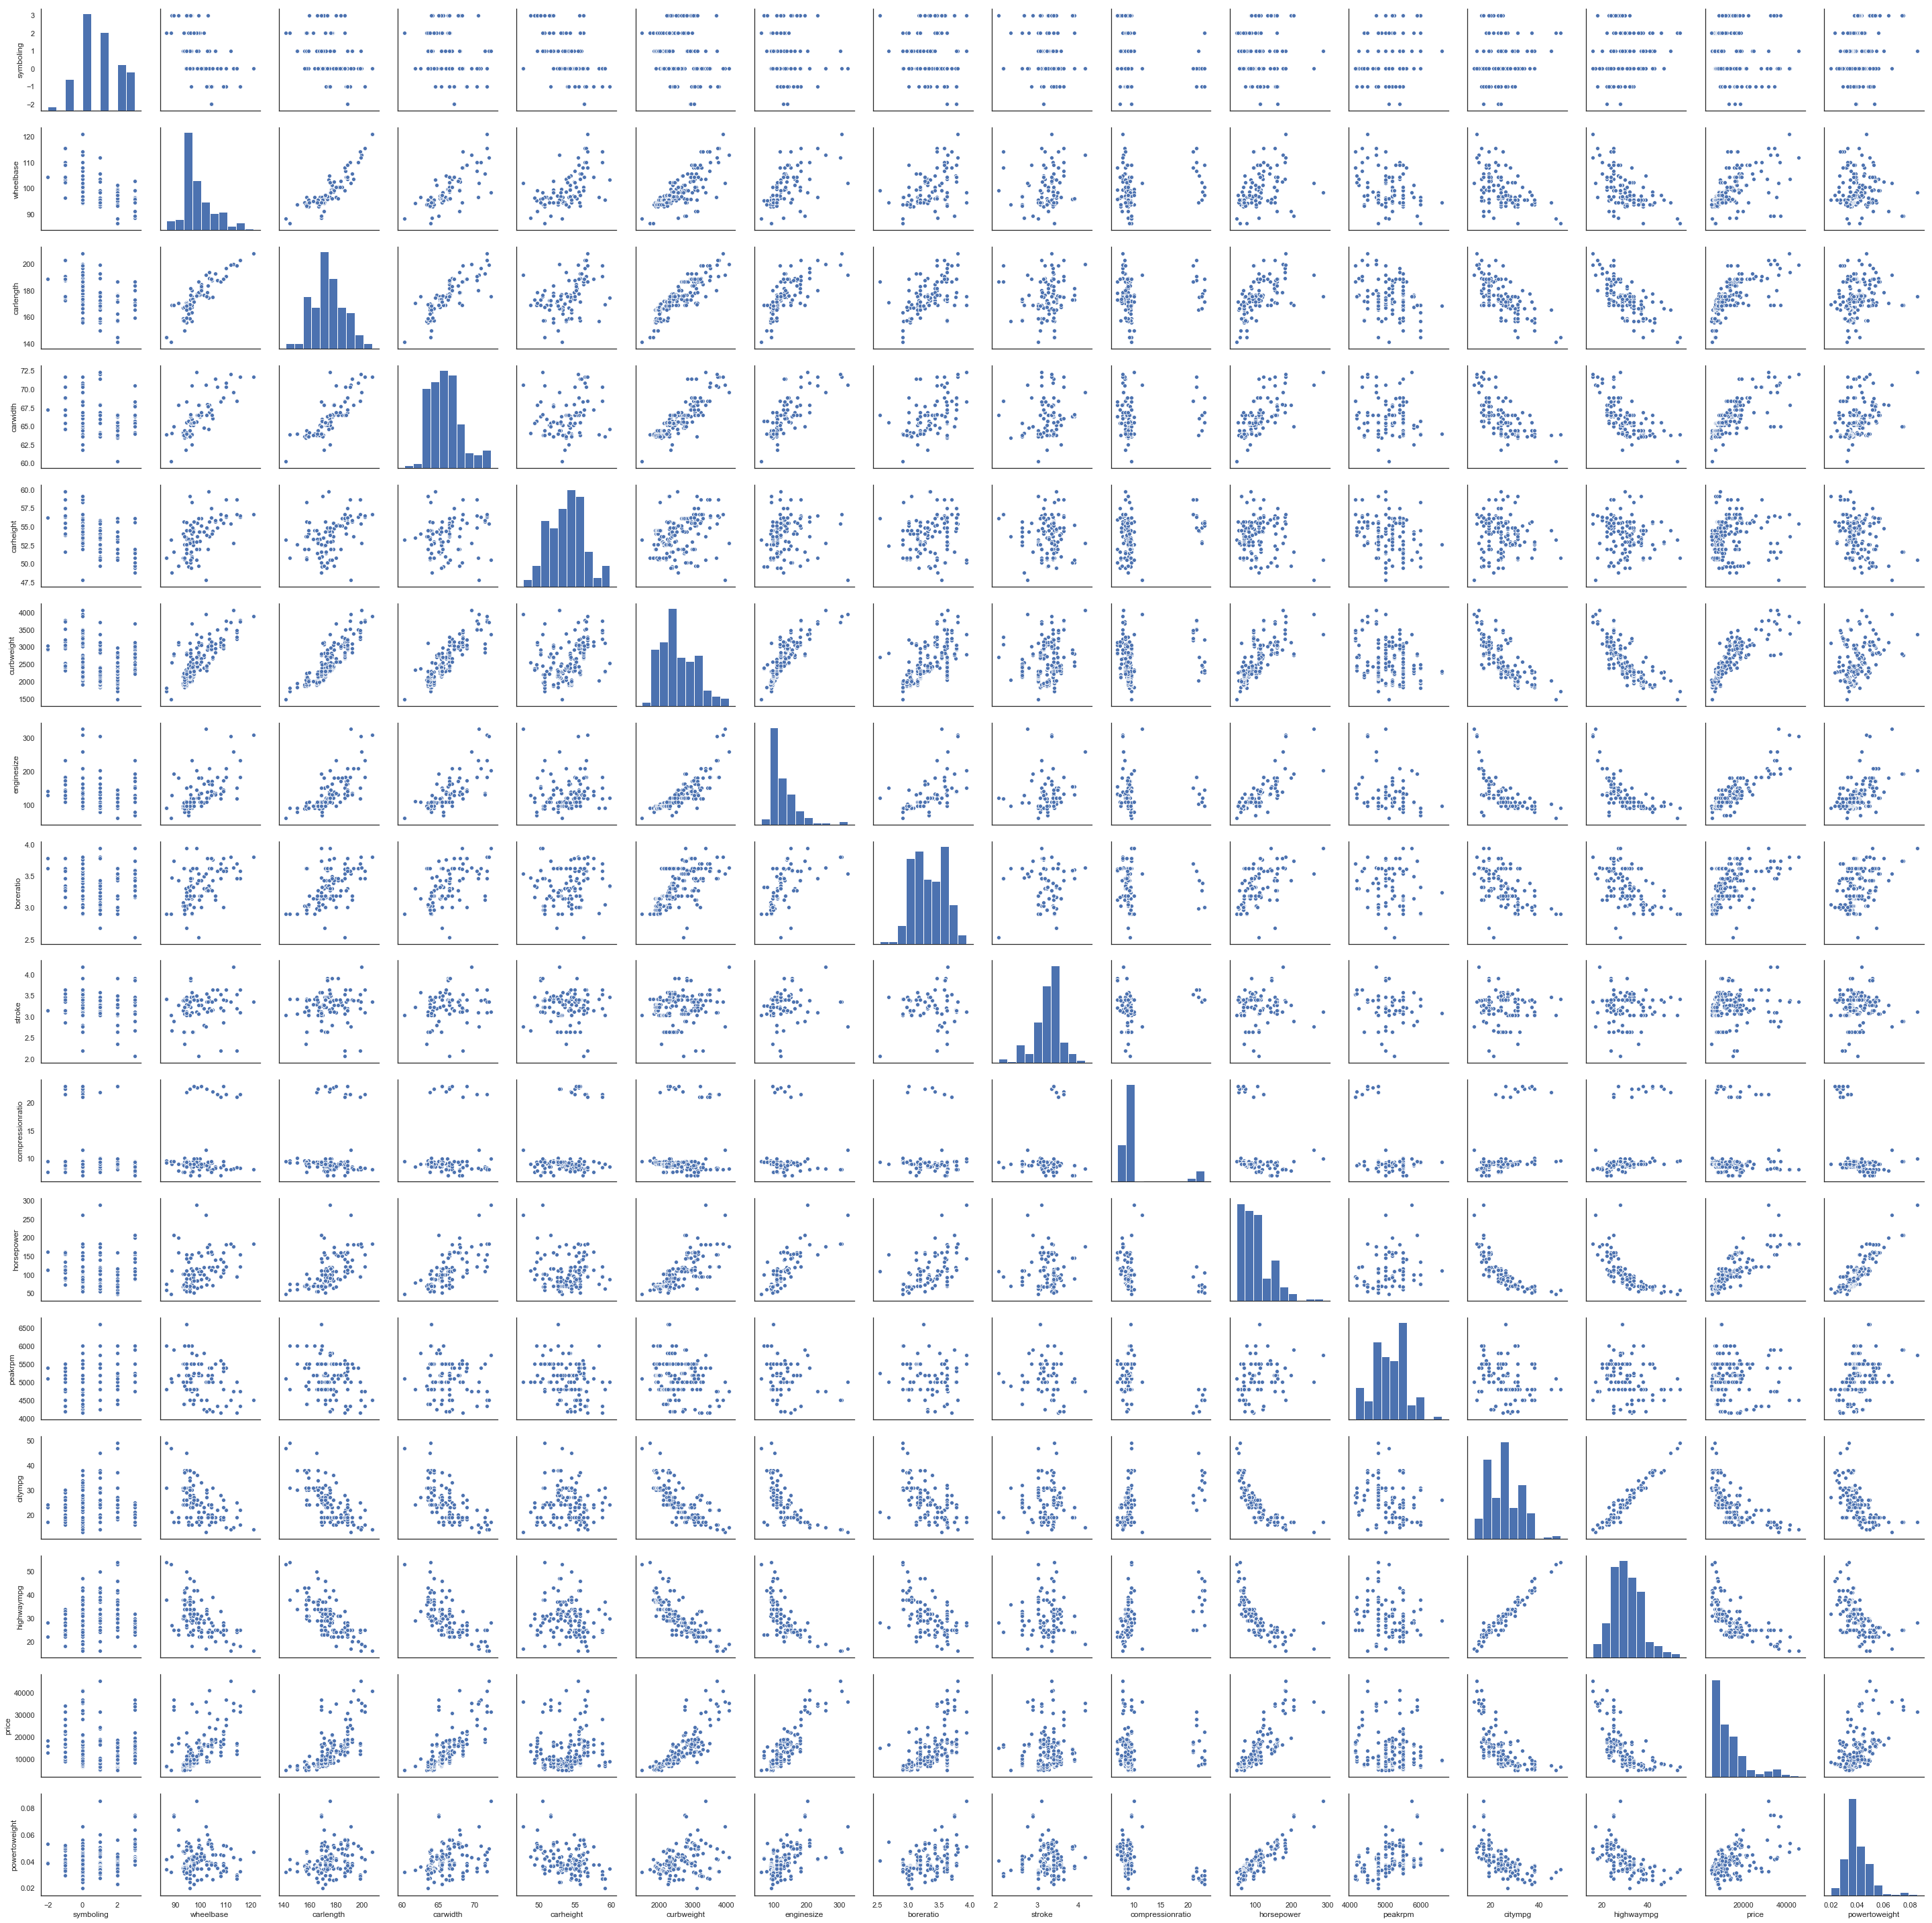

In [84]:
sns.pairplot(car_df)
plt.show()

Looking at pairwise distribution we can see that some variables are highly correlated with each other, lets see heatmap for the same

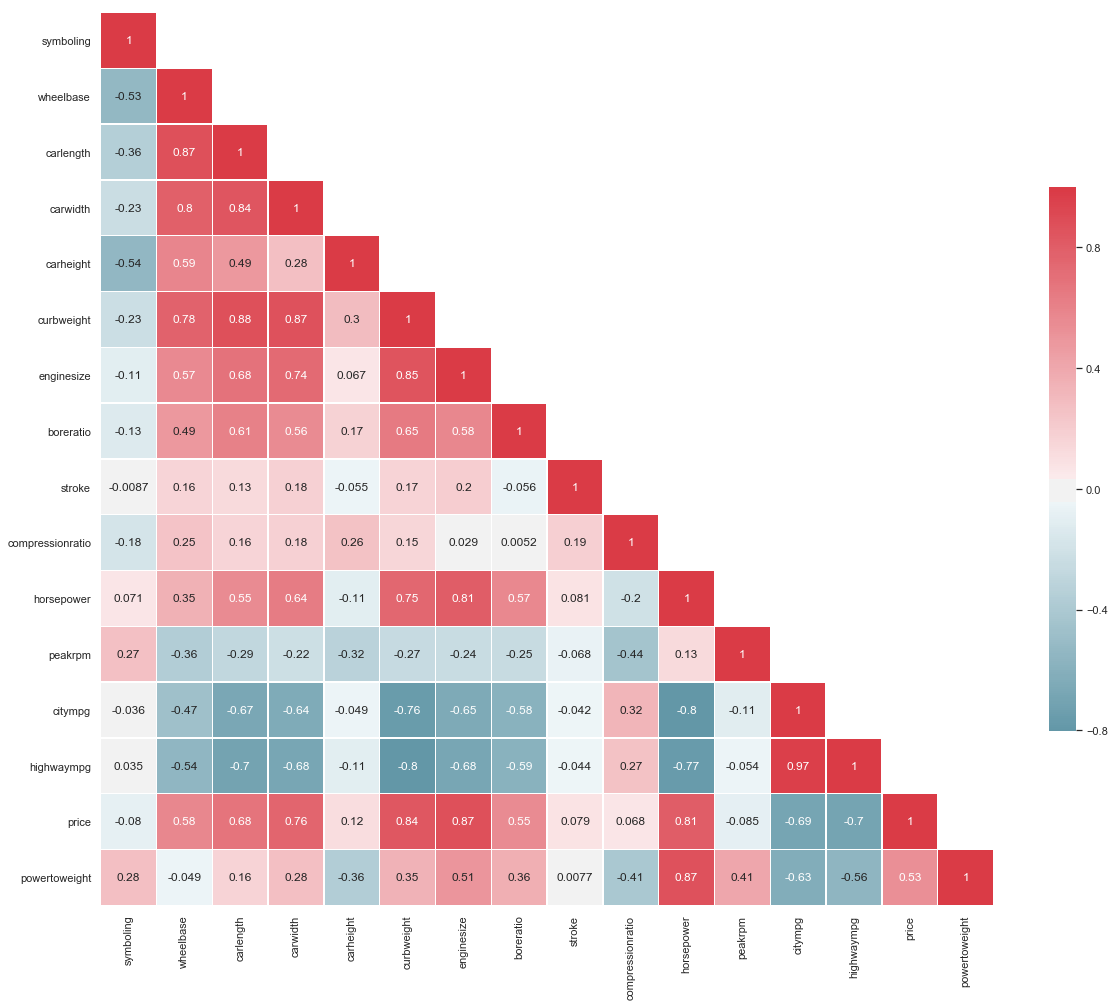

In [85]:
def correlation_heatmap(corr):
    sns.set(style="white")
    # Generate a mask for the upper triangle
    mask = np.ones_like(corr, dtype=np.bool)
    mask[np.tril_indices_from(mask)] = False


    # Set up the matplotlib figure
    f, ax = plt.subplots(figsize=(20, 20))

    # Generate a custom diverging colormap
    cmap = sns.diverging_palette(220, 10, as_cmap=True)

    # Draw the heatmap with the mask and correct aspect ratio
    sns.heatmap(corr, mask=mask, cmap=cmap, center=0, annot=True,
                square=True, linewidths=.5, cbar_kws={"shrink": .5})

correlation_heatmap(car_df.corr())

As we can observe that wheelbase is highly correlated to carlength and carwidth and wheelbase defines car length and width, hence we can drop car length and car width from the data set, similarly highwaympg and citympg is also highly correlated and hence will remove citympg



In [86]:
car_df.drop(['carlength', 'carwidth'], axis=1, inplace=True)

In [87]:
car_df.drop(['citympg'], axis=1, inplace=True)

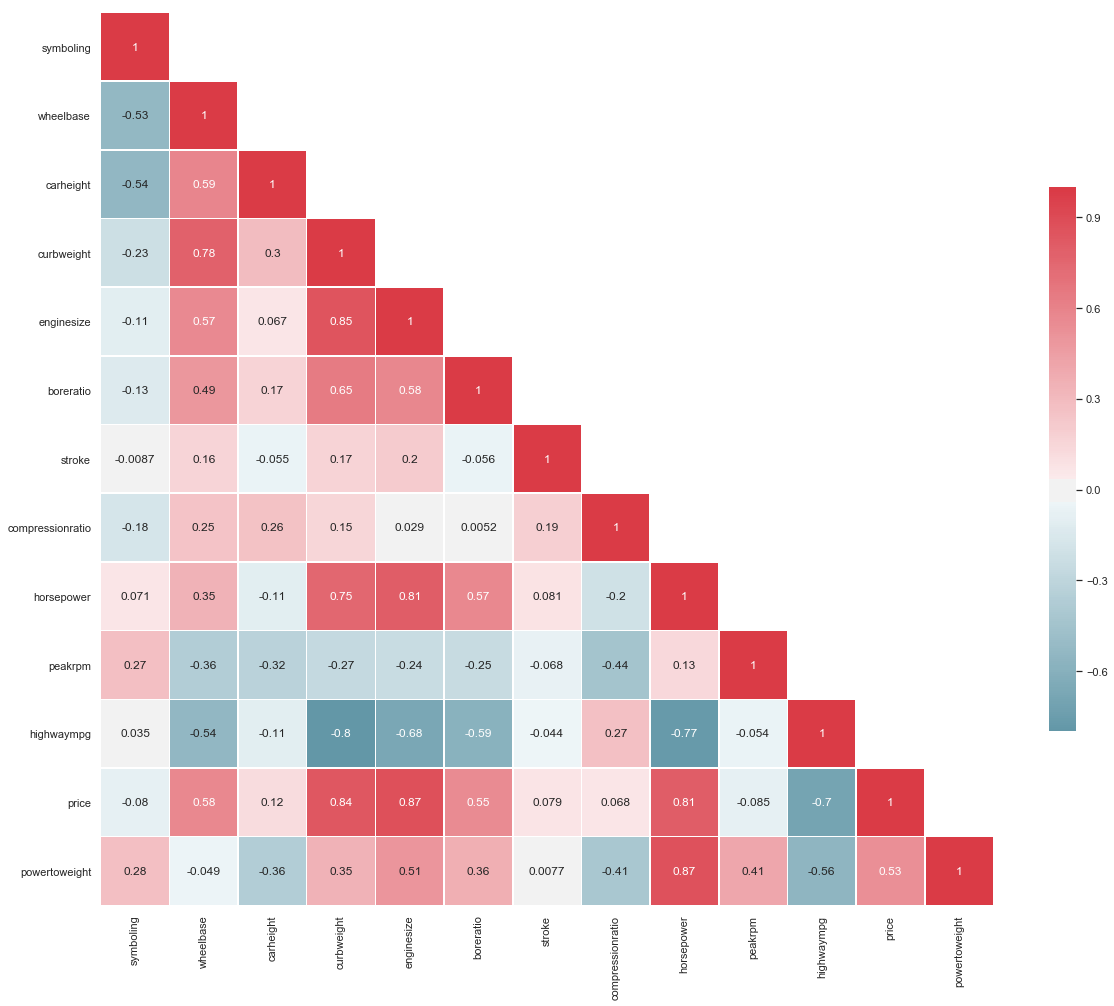

In [88]:
correlation_heatmap(car_df.corr())

#### Visualising Categorical Variables

As you might have noticed, there are a few categorical variables as well. Let's make a boxplot for some of these variables.

In [89]:
import math
def paired_box_plot(list_x,y,df):
    n=math.ceil(len(list_x)/3)
    plt.figure(figsize=(15, n*5))
    
    for i in range(len(list_x)):
        plt.subplot(n,3,i+1)
        sns.boxplot(x=list_x[i],y=y,data=df)
    plt.show()

In [22]:
numeric_type=['int64','float64']
cat_df = car_df.select_dtypes(exclude=numeric_type)


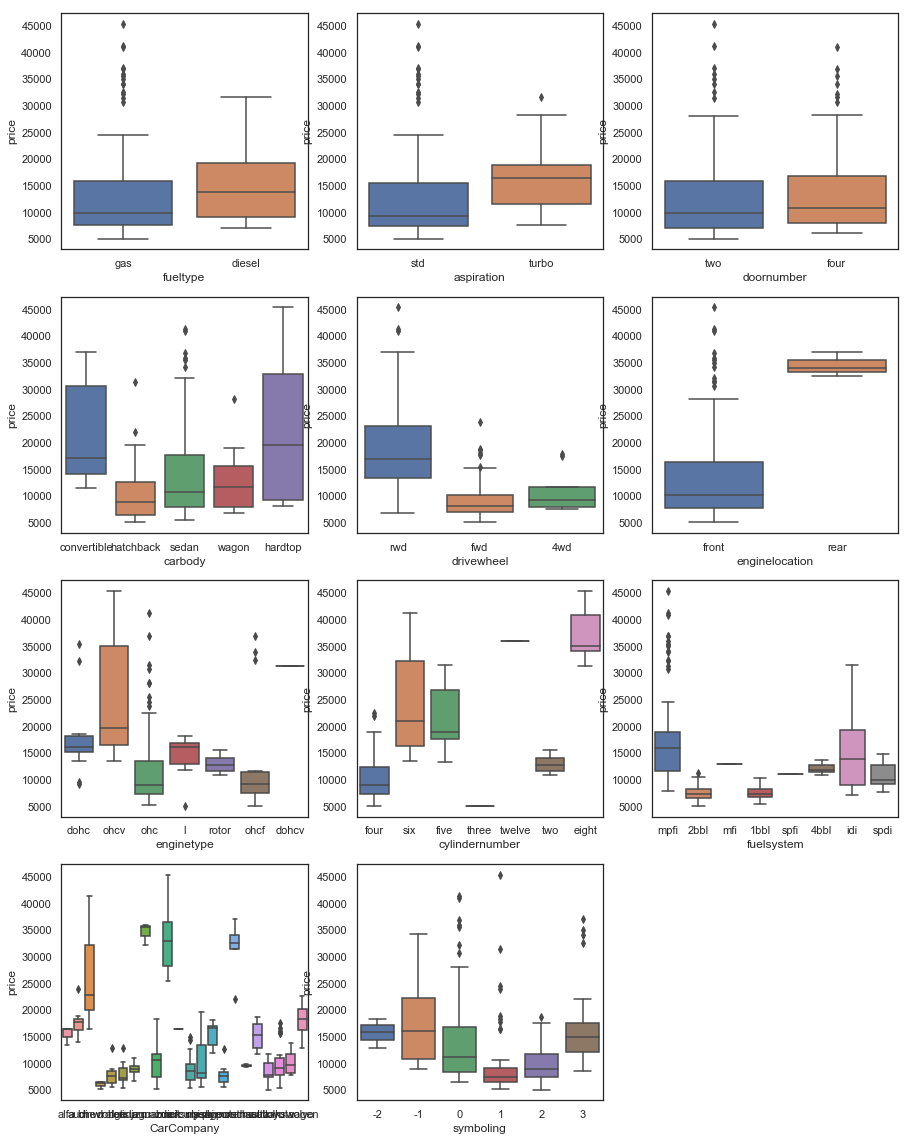

In [23]:
cat_var=cat_df.columns.tolist() 
cat_var.append('symboling')
paired_box_plot(cat_var,'price',car_df)

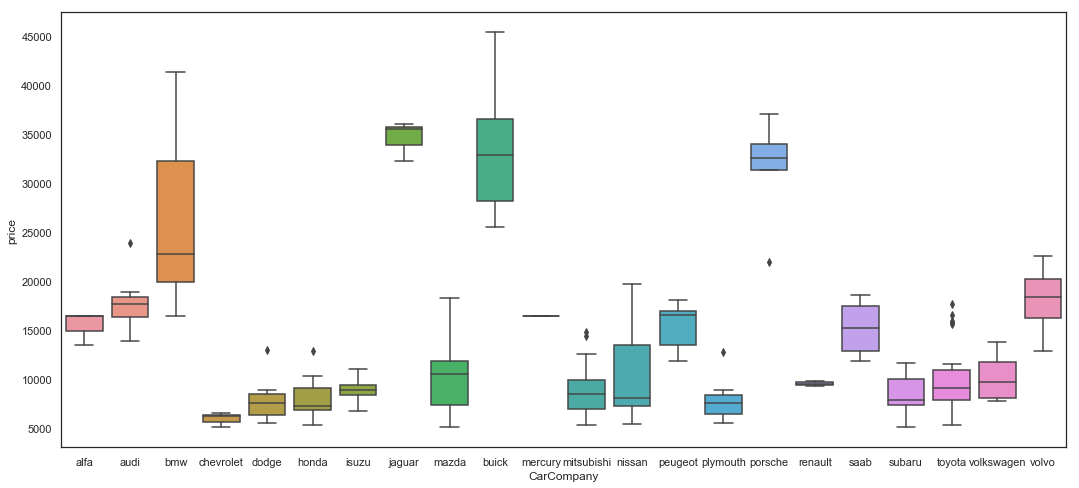

In [24]:
# paired_box_plot(['CarCompany'],'price',car_df)
plt.figure(figsize=(18, 8))
sns.boxplot(x='CarCompany',y='price',data=car_df)
plt.show()

## Step 3: Data Preparation

Lets convert cylindernumber and doornumber as numeric

In [25]:
car_df['cylindernumber'].unique()
nums = {'one':1,
        'two':2,
        'three':3,
        'four':4,
        'five':5,
        'six':6,
        'seven':7,
        'eight':8,
        'nine':9,
       'twelve':12
       }

In [26]:
def cylinder_map(x):
    if x < 4:
        return 'Low_Cylinder'
    elif x < 8:
        return 'Medium_Cylinder'
    else:
        return 'High_Cylinder'

car_df['cylindernumber']=car_df['cylindernumber'].replace(nums)
car_df['cylindernumber']=car_df['cylindernumber'].map(cylinder_map)
car_df['cylindernumber'].value_counts()

Medium_Cylinder    194
High_Cylinder        6
Low_Cylinder         5
Name: cylindernumber, dtype: int64

In [27]:
car_df['doornumber']=car_df['doornumber'].replace(nums)

`symboling` has originally 7 values but we can classify it as 2 classes: 
* {-3,-2,-1,0} : Safe
* {1,2,3} : Risky

In [28]:
car_df['symboling']=car_df['symboling'].apply(lambda x: 'Safe' if x<=0 else 'Risky')
car_df['symboling'].value_counts()

Risky    113
Safe      92
Name: symboling, dtype: int64

### Dummy Variables

In [29]:
fueltype = pd.get_dummies(car_df['fueltype'], drop_first=True)
aspiration =pd.get_dummies(car_df['aspiration'], drop_first=True)
carbody =pd.get_dummies(car_df['carbody'], drop_first=True)
drivewheel =pd.get_dummies(car_df['drivewheel'], drop_first=True)
enginelocation =pd.get_dummies(car_df['enginelocation'], drop_first=True)
enginetype =pd.get_dummies(car_df['enginetype'], drop_first=True)
fuelsystem =pd.get_dummies(car_df['fuelsystem'], drop_first=True)
carcompany =pd.get_dummies(car_df['CarCompany'], drop_first=True)
cylindernumber=pd.get_dummies(car_df['cylindernumber'])
symboling =pd.get_dummies(car_df['symboling'], drop_first=True)

In [30]:
# Add the results to the original housing dataframe

car_df = pd.concat([car_df, fueltype,aspiration,carbody,drivewheel,enginelocation,enginetype,fuelsystem,carcompany,cylindernumber,symboling ], axis = 1)
car_df.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,highwaympg,price,CarCompany,powertoweight,gas,turbo,hardtop,hatchback,sedan,wagon,fwd,rwd,rear,dohcv,l,ohc,ohcf,ohcv,rotor,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi,audi,bmw,buick,chevrolet,dodge,honda,isuzu,jaguar,mazda,mercury,mitsubishi,nissan,peugeot,plymouth,porsche,renault,saab,subaru,toyota,volkswagen,volvo,High_Cylinder,Low_Cylinder,Medium_Cylinder,Safe
car_ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,Risky,gas,std,2,convertible,rwd,front,88.6,48.8,2548,dohc,Medium_Cylinder,130,mpfi,3.47,2.68,9.0,111,5000,27,13495.0,alfa,0.043564,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,Risky,gas,std,2,convertible,rwd,front,88.6,48.8,2548,dohc,Medium_Cylinder,130,mpfi,3.47,2.68,9.0,111,5000,27,16500.0,alfa,0.043564,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,Risky,gas,std,2,hatchback,rwd,front,94.5,52.4,2823,ohcv,Medium_Cylinder,152,mpfi,2.68,3.47,9.0,154,5000,26,16500.0,alfa,0.054552,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,Risky,gas,std,4,sedan,fwd,front,99.8,54.3,2337,ohc,Medium_Cylinder,109,mpfi,3.19,3.40,10.0,102,5500,30,13950.0,audi,0.043646,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
5,Risky,gas,std,4,sedan,4wd,front,99.4,54.3,2824,ohc,Medium_Cylinder,136,mpfi,3.19,3.40,8.0,115,5500,22,17450.0,audi,0.040722,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [31]:
car_df.drop(['symboling','fueltype', 'aspiration', 'carbody', 'drivewheel', 'enginelocation', 'enginetype', 'fuelsystem', 'CarCompany','cylindernumber'], axis=1, inplace=True)

In [32]:
car_df.head()

,doornumber,wheelbase,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,highwaympg,price,powertoweight,gas,turbo,hardtop,hatchback,sedan,wagon,fwd,rwd,rear,dohcv,l,ohc,ohcf,ohcv,rotor,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi,audi,bmw,buick,chevrolet,dodge,honda,isuzu,jaguar,mazda,mercury,mitsubishi,nissan,peugeot,plymouth,porsche,renault,saab,subaru,toyota,volkswagen,volvo,High_Cylinder,Low_Cylinder,Medium_Cylinder,Safe
car_ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,2,88.6,48.8,2548,130,3.47,2.68,9.0,111,5000,27,13495.0,0.043564,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,2,88.6,48.8,2548,130,3.47,2.68,9.0,111,5000,27,16500.0,0.043564,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,2,94.5,52.4,2823,152,2.68,3.47,9.0,154,5000,26,16500.0,0.054552,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,4,99.8,54.3,2337,109,3.19,3.40,10.0,102,5500,30,13950.0,0.043646,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
5,4,99.4,54.3,2824,136,3.19,3.40,8.0,115,5500,22,17450.0,0.040722,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


## Step 4: Splitting the Data into Training and Testing Sets


In [33]:
from sklearn.model_selection  import train_test_split

In [34]:
np.random.seed(0)
df_train, df_test = train_test_split(car_df, train_size=0.7, test_size=0.3, random_state=100)

### Rescaling the Features 

In [35]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

In [36]:
var=['wheelbase','carheight','curbweight','enginesize','horsepower','peakrpm','highwaympg','price','powertoweight']

In [37]:
df_train[var]=scaler.fit_transform(df_train[var])

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [38]:
df_train.head(10)

,doornumber,wheelbase,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,highwaympg,price,powertoweight,gas,turbo,hardtop,hatchback,sedan,wagon,fwd,rwd,rear,dohcv,l,ohc,ohcf,ohcv,rotor,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi,audi,bmw,buick,chevrolet,dodge,honda,isuzu,jaguar,mazda,mercury,mitsubishi,nissan,peugeot,plymouth,porsche,renault,saab,subaru,toyota,volkswagen,volvo,High_Cylinder,Low_Cylinder,Medium_Cylinder,Safe
car_ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
123,4,0.244828,0.265487,0.272692,0.139623,2.97,3.23,9.4,0.083333,0.551020,0.567568,0.068818,0.169146,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
126,2,0.272414,0.212389,0.500388,0.339623,3.94,3.11,9.5,0.395833,0.551020,0.270270,0.466890,0.480607,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
167,2,0.272414,0.424779,0.314973,0.139623,3.24,3.08,9.4,0.266667,1.000000,0.324324,0.122110,0.438242,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
2,2,0.068966,0.088496,0.411171,0.260377,3.47,2.68,9.0,0.262500,0.346939,0.270270,0.314446,0.360040,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
200,4,0.610345,0.858407,0.647401,0.260377,3.62,3.15,7.5,0.475000,0.387755,0.135135,0.382131,0.478148,1,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1
191,2,0.272414,0.318584,0.284329,0.181132,3.19,3.40,8.5,0.175000,0.551020,0.324324,0.134321,0.313697,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
97,4,0.272414,0.592920,0.187355,0.135849,3.15,3.29,9.4,0.087500,0.428571,0.540541,0.065779,0.229665,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
178,4,0.544828,0.539823,0.376261,0.230189,3.31,3.54,8.7,0.183333,0.020408,0.405405,0.169351,0.266558,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1
182,4,0.617241,0.557522,0.645074,0.377358,3.27,3.35,9.2,0.450000,0.428571,0.189189,0.293726,0.450622,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1


In [39]:
df_train.describe()

,doornumber,wheelbase,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,highwaympg,price,powertoweight,gas,turbo,hardtop,hatchback,sedan,wagon,fwd,rwd,rear,dohcv,l,ohc,ohcf,ohcv,rotor,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi,audi,bmw,buick,chevrolet,dodge,honda,isuzu,jaguar,mazda,mercury,mitsubishi,nissan,peugeot,plymouth,porsche,renault,saab,subaru,toyota,volkswagen,volvo,High_Cylinder,Low_Cylinder,Medium_Cylinder,Safe
count,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.0,143.000000,143.000000,143.0,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.0,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000
mean,3.118881,0.411141,0.509004,0.407878,0.241351,3.307413,3.250070,10.052587,0.227302,0.400029,0.374976,0.219310,0.301305,0.909091,0.181818,0.020979,0.342657,0.475524,0.132867,0.594406,0.349650,0.006993,0.006993,0.062937,0.685315,0.083916,0.062937,0.027972,0.349650,0.020979,0.090909,0.0,0.440559,0.041958,0.0,0.034965,0.041958,0.034965,0.020979,0.041958,0.062937,0.020979,0.020979,0.090909,0.0,0.062937,0.097902,0.055944,0.027972,0.020979,0.013986,0.020979,0.076923,0.139860,0.048951,0.041958,0.027972,0.034965,0.937063,0.454545
std,0.996399,0.205581,0.215378,0.211269,0.154619,0.260997,0.312529,3.794890,0.165511,0.196438,0.188477,0.215682,0.139794,0.288490,0.387050,0.143818,0.476266,0.501156,0.340624,0.492733,0.478536,0.083624,0.083624,0.243703,0.466023,0.278236,0.243703,0.165472,0.478536,0.143818,0.288490,0.0,0.498199,0.201198,0.0,0.184337,0.201198,0.184337,0.143818,0.201198,0.243703,0.143818,0.143818,0.288490,0.0,0.243703,0.298227,0.230621,0.165472,0.143818,0.117845,0.143818,0.267406,0.348061,0.216524,0.201198,0.165472,0.184337,0.243703,0.499680
min,2.000000,0.000000,0.000000,0.000000,0.000000,2.680000,2.190000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.272414,0.353982,0.245539,0.135849,3.065000,3.110000,8.600000,0.091667,0.265306,0.216216,0.067298,0.218294,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,4.000000,0.341379,0.522124,0.355702,0.184906,3.310000,3.270000,9.000000,0.191667,0.428571,0.378378,0.140343,0.268725,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,4.000000,0.503448,0.668142,0.559542,0.301887,3.540000,3.400000,9.400000,0.283333,0.551020,0.527027,0.313479,0.360401,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.00

## Step 5: Building a linear model

#### Dividing into X and Y sets for the model building

In [40]:
y_train=df_train.pop('price')
X_train=df_train

#### RFE

In [41]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [42]:
#get 20 variables from RFE
lm=LinearRegression()
lm.fit(X_train,y_train)

rfe=RFE(lm,20)
rfe=rfe.fit(X_train,y_train)

In [43]:
list(zip(X_train.columns, rfe.support_,rfe.ranking_))

[('doornumber', False, 34),
 ('wheelbase', True, 1),
 ('carheight', False, 3),
 ('curbweight', False, 15),
 ('enginesize', True, 1),
 ('boreratio', True, 1),
 ('stroke', False, 21),
 ('compressionratio', False, 27),
 ('horsepower', True, 1),
 ('peakrpm', True, 1),
 ('highwaympg', False, 4),
 ('powertoweight', True, 1),
 ('gas', False, 23),
 ('turbo', True, 1),
 ('hardtop', True, 1),
 ('hatchback', True, 1),
 ('sedan', True, 1),
 ('wagon', True, 1),
 ('fwd', False, 35),
 ('rwd', False, 30),
 ('rear', True, 1),
 ('dohcv', False, 33),
 ('l', False, 18),
 ('ohc', False, 25),
 ('ohcf', True, 1),
 ('ohcv', False, 36),
 ('rotor', True, 1),
 ('2bbl', False, 28),
 ('4bbl', True, 1),
 ('idi', False, 7),
 ('mfi', False, 39),
 ('mpfi', False, 29),
 ('spdi', False, 32),
 ('spfi', False, 37),
 ('audi', False, 20),
 ('bmw', True, 1),
 ('buick', False, 40),
 ('chevrolet', False, 11),
 ('dodge', False, 8),
 ('honda', False, 12),
 ('isuzu', False, 17),
 ('jaguar', False, 6),
 ('mazda', False, 19),
 ('me

In [68]:
col1 = X_train.columns[rfe.support_]
col1 =col.tolist()
print(col1)
col=['wheelbase', 'enginesize', 'boreratio', 'horsepower', 'peakrpm', 'powertoweight', 'turbo', 'hardtop', 'hatchback', 'sedan', 'wagon', 'rear', 'ohcf', 'rotor', '4bbl', 'bmw', 'peugeot', 'porsche', 'subaru', 'Low_Cylinder']

AttributeError: 'list' object has no attribute 'tolist'

In [45]:
import statsmodels.api as sm
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

def checkVIF(X):
    vif = pd.DataFrame()
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif

def build_model(X, y_train):
    X_lm = sm.add_constant(X)
    lm = sm.OLS(y_train,X_lm).fit()
    print(lm.summary())
    display(checkVIF(X))
    return lm , X_lm

Model 1 with all variables from RFE

In [46]:
X = X_train[col]
m1,X1=build_model(X,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.943
Model:                            OLS   Adj. R-squared:                  0.934
Method:                 Least Squares   F-statistic:                     106.7
Date:                Sun, 26 May 2019   Prob (F-statistic):           5.96e-67
Time:                        19:41:12   Log-Likelihood:                 221.50
No. Observations:                 143   AIC:                            -403.0
Df Residuals:                     123   BIC:                            -343.7
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.4356      0.112      3.903

,Features,VIF
12,ohcf,inf
18,subaru,inf
11,rear,inf
5,powertoweight,136.800000
3,horsepower,131.880000
2,boreratio,83.770000
1,enginesize,49.150000
0,wheelbase,24.430000
9,sedan,20.580000
8,hatchback,14.200000


Model 2 after removing subaru because of inf VIF value

In [47]:
col.remove('subaru')


In [48]:
X = X_train[col]
m2,X2 =build_model(X,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.943
Model:                            OLS   Adj. R-squared:                  0.934
Method:                 Least Squares   F-statistic:                     106.7
Date:                Sun, 26 May 2019   Prob (F-statistic):           5.96e-67
Time:                        19:41:12   Log-Likelihood:                 221.50
No. Observations:                 143   AIC:                            -403.0
Df Residuals:                     123   BIC:                            -343.7
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.4356      0.112      3.903

,Features,VIF
5,powertoweight,136.80
3,horsepower,131.88
2,boreratio,83.77
1,enginesize,49.15
0,wheelbase,24.43
9,sedan,20.58
8,hatchback,14.20
4,peakrpm,12.00
13,rotor,8.72
10,wagon,6.43


**Model 3**: removing `powertoweight` ratio because of high VIF

In [49]:
col.remove('powertoweight')

In [50]:
X = X_train[col]
m3,X3 = build_model(X,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.928
Model:                            OLS   Adj. R-squared:                  0.918
Method:                 Least Squares   F-statistic:                     89.23
Date:                Sun, 26 May 2019   Prob (F-statistic):           5.64e-62
Time:                        19:41:12   Log-Likelihood:                 205.40
No. Observations:                 143   AIC:                            -372.8
Df Residuals:                     124   BIC:                            -316.5
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2521      0.119      2.120   

,Features,VIF
2,boreratio,54.28
1,enginesize,35.29
3,horsepower,24.99
8,sedan,19.34
0,wheelbase,17.26
7,hatchback,12.93
4,peakrpm,10.75
12,rotor,8.70
9,wagon,6.41
17,Low_Cylinder,5.24


<b>Model 4</b> Removing `horsepower` because of high p value which makes the variable insignificant in presence of other variables

In [51]:
col.remove('horsepower')

In [52]:
X = X_train[col]
m4,X4=build_model(X,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.928
Model:                            OLS   Adj. R-squared:                  0.919
Method:                 Least Squares   F-statistic:                     95.24
Date:                Sun, 26 May 2019   Prob (F-statistic):           5.68e-63
Time:                        19:41:12   Log-Likelihood:                 205.40
No. Observations:                 143   AIC:                            -374.8
Df Residuals:                     125   BIC:                            -321.5
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2524      0.117      2.165   

,Features,VIF
2,boreratio,50.13
7,sedan,19.28
0,wheelbase,17.10
6,hatchback,12.93
1,enginesize,9.34
11,rotor,8.23
3,peakrpm,7.09
8,wagon,6.41
16,Low_Cylinder,5.24
12,4bbl,4.00


**Model 5** : Removing `4bbl` due to high p value

In [53]:
col.remove('4bbl')


In [54]:
X = X_train[col]
m5,X5=build_model(X,y_train)


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.928
Model:                            OLS   Adj. R-squared:                  0.919
Method:                 Least Squares   F-statistic:                     101.3
Date:                Sun, 26 May 2019   Prob (F-statistic):           8.25e-64
Time:                        19:41:12   Log-Likelihood:                 204.94
No. Observations:                 143   AIC:                            -375.9
Df Residuals:                     126   BIC:                            -325.5
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2532      0.116      2.174   

,Features,VIF
2,boreratio,50.12
7,sedan,19.28
0,wheelbase,17.10
6,hatchback,12.93
1,enginesize,9.33
3,peakrpm,7.09
8,wagon,6.41
11,rotor,5.25
15,Low_Cylinder,5.24
5,hardtop,2.30


**Model 6** : Removing `ohcf` due to high p value

In [55]:
col.remove('ohcf')

In [56]:
X = X_train[col]
m6,X6=build_model(X,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.927
Model:                            OLS   Adj. R-squared:                  0.919
Method:                 Least Squares   F-statistic:                     107.9
Date:                Sun, 26 May 2019   Prob (F-statistic):           1.34e-64
Time:                        19:41:12   Log-Likelihood:                 204.32
No. Observations:                 143   AIC:                            -376.6
Df Residuals:                     127   BIC:                            -329.2
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1892      0.099      1.907   

,Features,VIF
2,boreratio,44.29
7,sedan,19.22
0,wheelbase,16.84
6,hatchback,12.79
1,enginesize,9.08
8,wagon,6.41
3,peakrpm,6.40
10,rotor,5.23
14,Low_Cylinder,5.22
5,hardtop,2.28


**Model 7** : Removing `rotor` due to high p value

In [57]:
col.remove('rotor')

In [58]:
X = X_train[col]
m7,X7=build_model(X,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.926
Model:                            OLS   Adj. R-squared:                  0.918
Method:                 Least Squares   F-statistic:                     115.2
Date:                Sun, 26 May 2019   Prob (F-statistic):           2.35e-65
Time:                        19:41:12   Log-Likelihood:                 203.58
No. Observations:                 143   AIC:                            -377.2
Df Residuals:                     128   BIC:                            -332.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1681      0.098      1.723   

,Features,VIF
2,boreratio,44.29
7,sedan,18.94
0,wheelbase,16.46
6,hatchback,12.64
1,enginesize,9.02
8,wagon,6.33
3,peakrpm,6.25
5,hardtop,2.27
9,rear,2.10
11,peugeot,1.70


**Model 8** : Removing `boreratio` due to high VIF value

In [59]:
col.remove('boreratio')

In [60]:
X = X_train[col]
m8,X8=build_model(X,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.925
Model:                            OLS   Adj. R-squared:                  0.917
Method:                 Least Squares   F-statistic:                     121.5
Date:                Sun, 26 May 2019   Prob (F-statistic):           1.12e-65
Time:                        19:41:12   Log-Likelihood:                 201.69
No. Observations:                 143   AIC:                            -375.4
Df Residuals:                     129   BIC:                            -333.9
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0004      0.037      0.010   

,Features,VIF
0,wheelbase,16.46
6,sedan,7.54
1,enginesize,7.35
2,peakrpm,5.74
5,hatchback,4.68
7,wagon,2.82
8,rear,2.08
4,hardtop,1.69
11,porsche,1.69
10,peugeot,1.68


**Model 9** : Removing `wheelbase` due to high VIF value

In [61]:
col.remove('peakrpm')

In [62]:
X = X_train[col]
m9,X9=build_model(X,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.919
Model:                            OLS   Adj. R-squared:                  0.911
Method:                 Least Squares   F-statistic:                     122.5
Date:                Sun, 26 May 2019   Prob (F-statistic):           1.08e-64
Time:                        19:41:13   Log-Likelihood:                 196.45
No. Observations:                 143   AIC:                            -366.9
Df Residuals:                     130   BIC:                            -328.4
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0440      0.035      1.258   

,Features,VIF
0,wheelbase,16.34
1,enginesize,7.35
5,sedan,4.79
4,hatchback,2.45
6,wagon,2.10
7,rear,2.08
10,porsche,1.67
9,peugeot,1.66
3,hardtop,1.60
2,turbo,1.41


**Model 10** : Removing `peugeot` due to high VIF value

In [63]:
col.remove('peugeot')

In [64]:
X = X_train[col]
m10,X10=build_model(X,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.904
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     112.6
Date:                Sun, 26 May 2019   Prob (F-statistic):           3.73e-61
Time:                        19:41:13   Log-Likelihood:                 184.77
No. Observations:                 143   AIC:                            -345.5
Df Residuals:                     131   BIC:                            -310.0
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0371      0.038      0.982   

,Features,VIF
0,wheelbase,11.96
1,enginesize,6.50
5,sedan,4.33
4,hatchback,2.19
7,rear,2.07
6,wagon,2.02
9,porsche,1.66
3,hardtop,1.59
2,turbo,1.38
10,Low_Cylinder,1.18


**Model 11** : Removing `wheelbase` due to high p value

In [65]:
col.remove('rear')

In [66]:
X = X_train[col]
m11,X11=build_model(X,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.901
Model:                            OLS   Adj. R-squared:                  0.893
Method:                 Least Squares   F-statistic:                     119.8
Date:                Sun, 26 May 2019   Prob (F-statistic):           3.77e-61
Time:                        19:41:13   Log-Likelihood:                 182.10
No. Observations:                 143   AIC:                            -342.2
Df Residuals:                     132   BIC:                            -309.6
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0356      0.038      0.928   

,Features,VIF
0,wheelbase,11.72
1,enginesize,6.44
5,sedan,4.30
4,hatchback,2.19
6,wagon,2.00
2,turbo,1.38
8,porsche,1.29
3,hardtop,1.19
9,Low_Cylinder,1.18
7,bmw,1.16


**Model 12** : Removing `peakrpm` due to high VIF value

In [67]:
col.remove('peakrpm')

ValueError: list.remove(x): x not in list

In [ ]:
X = X_train[col]
m12,X12=build_model(X,y_train)

**Model 13** : Removing `hardtop` due to high p value

In [ ]:
col.remove('hardtop')

In [ ]:
X = X_train[col]
m13,X13=build_model(X,y_train)

**Model 14** : Removing `wagon` due to high p value

In [ ]:
col.remove('wagon')

In [ ]:
X = X_train[col]
m14,X14=build_model(X,y_train)

**FINAL MODEL** : Removing `sedan` due to high VIF value

In [ ]:
col.remove('sedan')

In [ ]:
X = X_train[col]
lm,X_train_lm=build_model(X,y_train)

## Step 6: Residual Analysis of the train data

So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [ ]:
y_train_price = lm.predict(X_train_lm)

In [ ]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)
plt.show()

## Step 7: Making Predictions Using the Final Model

Now that we have fitted the model and checked the normality of error terms, it's time to go ahead and make predictions using the final model.

<b>Applying the scaling on the test sets

In [ ]:
print(var)

In [ ]:
df_test[var] = scaler.transform(df_test[var])

In [ ]:
df_test.describe()

<b>Dividing into X_test and y_test

In [ ]:
y_test=df_test.pop('price')
X_test=df_test

In [ ]:
X_test_s = X_test[col]

In [ ]:
# Adding constant variable to test dataframe
X_test_m = sm.add_constant(X_test_s)
X_test_m.head()

In [ ]:
y_pred_lm = lm.predict(X_test_m)

## Step 8: Model Evaluation

Let's now plot the graph for actual versus predicted values.

In [ ]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred_lm)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)      

In [ ]:
from sklearn.metrics import r2_score


In [ ]:
r2_sc = r2_score(y_test, y_pred_lm)
print(round(r2_sc,3))

## Conclusion/Analysis


###### We can see that the equation of our best fitted line is:

$ price=  1.1143  \times  enginesize +  0.0906  \times  turbo + 0.2175  \times bmw + 0.2574 \times porsche + 0.2571 \times Low\_Cylinder $


### $r^2\_score: 0.864 $

##### With the help of our model we can make few observations:
* **Engine**
    * Geely Motor have to keep a higher enginesize to price the car on higher side
    * Geely Motor should choose turbo engine over standard engine
    * The should keep less than four cylinders in engine
* **Branding**
    * To price their car higher Geely Motor has to establish a reputation like BMW and Porsche.
    * Geely Motor need to target the luxury segment for pricing their cars high
